In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

/Users/andy/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()

In [3]:
#將feature轉為四維矩陣，60000x28x28x1(1代表單色影像，一維)
X_Train4D = X_Train.reshape(X_Train.shape[0],28,28,1).astype('float32')
X_Test4D = X_Test.reshape(X_Test.shape[0],28,28,1).astype('float32')

In [4]:
#標準化
X_Train4D_normalize = X_Train4D/255
X_Test4D_normalize = X_Test4D/255

In [5]:
#Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立CNN模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [7]:
#建立線性堆疊模型
model = Sequential()

In [8]:
#建立卷積層1
model.add(Conv2D(filters=16, #建立16個fliter weight
                kernel_size=(5,5), #每一個filter 5x5大小
                padding='same', #在矩陣邊界外補0
                input_shape=(28,28,1),
                activation='relu'))

In [9]:
#建立池化層1，將28x28縮減為14x14
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
#建立卷積層2
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

In [11]:
#建立池化層2，將36個14x14縮減為7x7
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25))

In [13]:
#建立平坦層，降為一維向量36x7x7x1=1764
model.add(Flatten())

In [14]:
#建立隱藏層，128個神經元
model.add(Dense(128, activation='relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [18]:
#設定模型參數，loss_function，optimizer，評估方式為accuracy
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [19]:
#開始訓練
train_history=model.fit(x=X_Train4D_normalize,
                       y=y_TrainOneHot,validation_split=0.2,
                       epochs=10, batch_size=300, verbose=2) #執行10次訓練週期，每一批次300筆資料，所以每一次執行約為48000/300=160筆資料，verbose顯示訓練過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 53s - loss: 0.4905 - acc: 0.8472 - val_loss: 0.0970 - val_acc: 0.9724
Epoch 2/10
 - 51s - loss: 0.1405 - acc: 0.9584 - val_loss: 0.0630 - val_acc: 0.9803
Epoch 3/10
 - 50s - loss: 0.1016 - acc: 0.9693 - val_loss: 0.0517 - val_acc: 0.9836
Epoch 4/10
 - 50s - loss: 0.0837 - acc: 0.9756 - val_loss: 0.0466 - val_acc: 0.9860
Epoch 5/10
 - 51s - loss: 0.0715 - acc: 0.9783 - val_loss: 0.0388 - val_acc: 0.9881
Epoch 6/10
 - 54s - loss: 0.0634 - acc: 0.9813 - val_loss: 0.0384 - val_acc: 0.9883
Epoch 7/10
 - 56s - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0441 - val_acc: 0.9868
Epoch 8/10
 - 57s - loss: 0.0507 - acc: 0.9848 - val_loss: 0.0332 - val_acc: 0.9901
Epoch 9/10
 - 53s - loss: 0.0452 - acc: 0.9865 - val_loss: 0.0339 - val_acc: 0.9905
Epoch 10/10
 - 50s - loss: 0.0415 - acc: 0.9869 - val_loss: 0.0339 - val_acc: 0.9903


In [20]:
#以圖表顯示訓練過程
import matplotlib.pylab as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'], loc='upper left') #設定圖例
    plt.show()

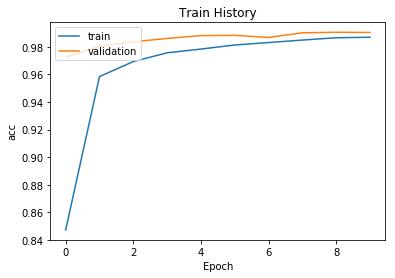

In [21]:
show_train_history(train_history,'acc','val_acc')

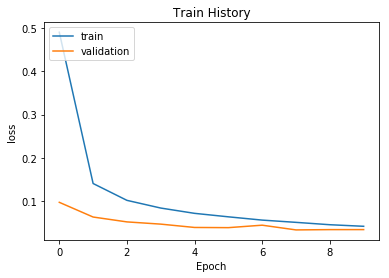

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
#評估模型準確率
scores = model.evaluate(X_Test4D_normalize, y_TestOneHot)
print("accuracy=",scores[1])

10000/10000 [==============================] - 5s 487us/step

In [24]:
#進行預測
prediction = model.predict_classes(X_Test4D_normalize)

In [25]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [26]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): #傳入參數數字影像、真實值、預測結果、開始顯示資料、資料筆數
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: 
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i) #建立subgraph子圖形為5行5列
        ax.imshow(images[idx], cmap="binary") #畫出subgraph
        title = "label=" + str(labels[idx]) #設定title,顯示標籤
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) #如果有傳入預測結果，title加入預設結果
        ax.set_title(title,fontsize=10) #設定title與大小
        ax.set_xticks([]) #不顯示刻度
        ax.set_yticks([])
        idx += 1 #讀取下一筆
    plt.show()

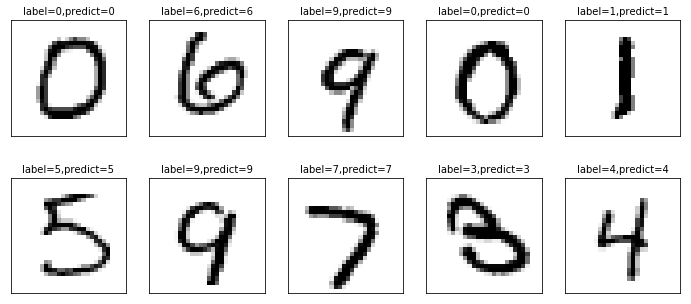

In [27]:
plot_images_labels_prediction(X_Test,y_Test,prediction,idx=10)

In [28]:
#建立混淆矩陣，對角線代表預測正確
import pandas as pd
pd.crosstab(y_Test,prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,2,2,1025,0,1,0,0,2,0,0
3,0,0,0,1003,0,3,0,2,2,0
4,0,0,0,0,976,0,1,0,1,4
5,1,0,0,5,0,882,2,0,0,2
6,5,2,0,0,2,1,947,0,1,0
7,0,3,3,2,0,0,0,1016,1,3
8,4,1,3,2,1,1,0,2,956,4
